# CompEngine dataset analysis
## Analysis #0: class distribution

**Project URL:** https://www.comp-engine.org/

**Get data in:** https://www.comp-engine.org/#!browse

**Date:** May 18 2020

### Objectives:
1. Analyse how many distinct classes there is in the dataset
2. Analyse the size of the dataset
3. Analyse how severe is the class disbalance in the dataset
4. Analyse which classes are the most frequent, and which is the least frequent
5. Analyse how many classes has $\leq 0.01$ percent of the data total size of examples

### Results (please check the analysis date):
1. There is 182 classes in the dataset 
2. There is 29488 instances in the dataset
3. The dataset is severely disbalanced (the top 5 most frequent classes accounts for 46.5% of the total instance number)
4. The most frequent classes are "Medical" (3.7%), "Micoeconomics" (5.2%), "Model M5a" (6.6%), "Finance" (8.9%) and "ECG" (22.2%).
5. Almost 90% of the classes have less than $0.01$ percent of instances relative to the dataset size

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np
import pandas as pd

In [2]:
# Note: read only the class labels, 'category'.
y = pd.read_csv("../data/comp-engine-export-metadata.20200503.csv", usecols=["category"])

## Category bar plot
Below, we can see that the category "ECG" ("Electrocardiograms", 22.2%) pretty much dominates the dataset, followed by "Finance" (8.9%) and "Model M5a" (6.6%) (from the artificial stochastic diferential equation group).

In [3]:
class_freqs = y["category"].value_counts(normalize=True, ascending=True)

print("Top 5 most frequent classes")
print(class_freqs[-5:].round(3))
print(f"Relative frequency sum of top 5 ranked classes: {sum(class_freqs[-5:]):.3f}")

Top 5 most frequent classes
Medical          0.037
Micoeconomics    0.052
Model M5a        0.066
Finance          0.089
ECG              0.222
Name: category, dtype: float64
Relative frequency sum of top 5 ranked classes: 0.465


In [4]:
# Note: class_freqs is normalized (therefore, it if the relative frequency of each class)
low_freq_classes = sum(class_freqs <= 0.01)
print("Number of classes less than 1% of the dataset total size: "
      f"{low_freq_classes} ({100. * low_freq_classes / class_freqs.size:.2f}%)")

Number of classes less than 1% of the dataset total size: 163 (89.56%)


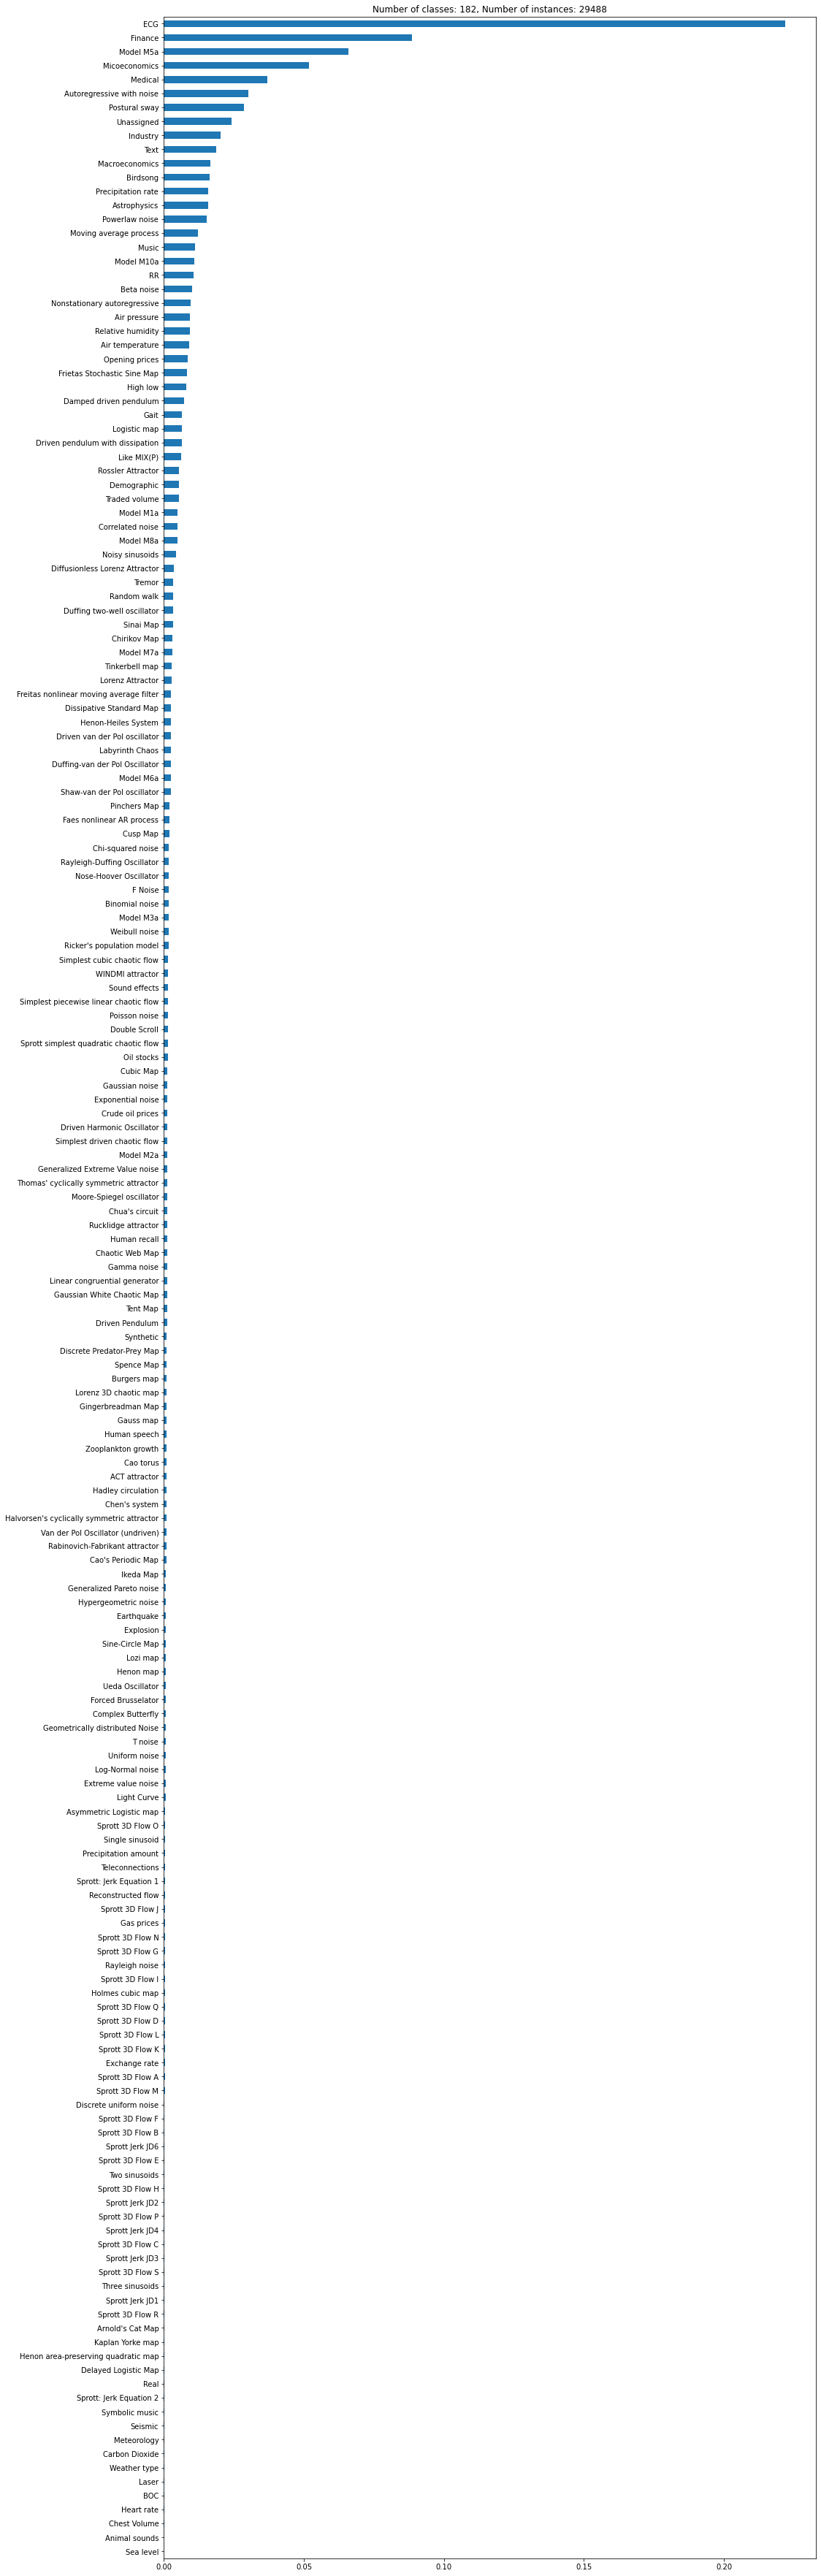

In [5]:
plot = class_freqs.plot(kind="barh", figsize=(16, 64))
plot.set_title(f"Number of classes: {class_freqs.size}, Number of instances: {y.size}")
plt.show()